In [1]:
import os
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/yuli/anaconda3/envs/py3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
DIR = '../Uncertainty_Results/'
SHIFT = 'different_author'
TASK = 'CodeSummary_Module'
model = 'code2vec'

src_dir = os.path.join(DIR, SHIFT, model, TASK)
# {train: array, val: array, test1: array, test2: array, test3: array}
label = torch.load(os.path.join(src_dir, 'truth.res')) # Boolean
vanilla = torch.load(os.path.join(src_dir, 'Vanilla.res'))
entropy = torch.load(os.path.join(src_dir, 'Entropy.res')) 
temp = torch.load(os.path.join(src_dir, 'ModelWithTemperature.res'))
dropout = torch.load(os.path.join(src_dir, 'ModelActivateDropout.res'))
mutant = torch.load(os.path.join(src_dir, 'Mutation.res')) # split [array, array, array, array]
dissector = torch.load(os.path.join(src_dir, 'PVScore.res')) # split [array, array, array]

In [34]:
method_transform = {
    'Vanilla': 'Vanilla',
    'Entropy': 'Entropy',
    'ModelWithTemperature': 'Temp Scale',
    'ModelActivateDropout': 'MC-Dropout',
    'Mutation': 'mMutant',
    'PVScore': 'Dissector',
}
task_transform = {
    'CodeSummary_Module': 'Method name prediction',
    'CodeCompletion_module': 'Code completion',
}
CSMODELS = ['code2vec', 'coderoberta', 'graphcodebert']
CCMODELS = ['lstm', 'codebert', 'codegpt']

def get_dataframe(shift: str, task: str):
    record = []
    if task == 'CodeSummary_Module':
        models = CSMODELS
    else:
        models = CCMODELS
    for model in models:
        res = torch.load(os.path.join(DIR, shift, model, task, 'uncertainty_eval.res'))
        for ue, outputs in res.items():
            auc_res = outputs['AUC']
            aupr_res = outputs['AUPR']
            brier_res = outputs['Brier']
            if ue in ['Mutation', 'PVScore']:
                auc_ins = {
                    'Method': method_transform[ue],
                    'Metric': 'AUC',
                    'Shift': shift,
                    'Task': task_transform[task],
                    'Model': model,
                    'Validation': auc_res[0]['val']*100,
                    'Shift1': auc_res[0]['test1']*100,
                    'Shift2': auc_res[0]['test2']*100,
                    'Shift3': auc_res[0]['test3']*100,
                }
                aupr_ins = {
                    'Method': method_transform[ue],
                    'Metric': 'AUPR',
                    'Shift': shift,
                    'Task': task_transform[task],
                    'Model': model,
                    'Validation': aupr_res[0]['val']*100,
                    'Shift1': aupr_res[0]['test1']*100,
                    'Shift2': aupr_res[0]['test2']*100,
                    'Shift3': aupr_res[0]['test3']*100,
                }
                brier_ins = {
                    'Method': method_transform[ue],
                    'Metric': 'Brier',
                    'Shift': shift,
                    'Task': task_transform[task],
                    'Model': model,
                    'Validation': brier_res[0]['val']*100,
                    'Shift1': brier_res[0]['test1']*100,
                    'Shift2': brier_res[0]['test2']*100,
                    'Shift3': brier_res[0]['test3']*100,
                }
            else:
                auc_ins = {
                    'Method': method_transform[ue],
                    'Metric': 'AUC',
                    'Shift': shift,
                    'Task': task_transform[task],
                    'Model': model,
                    'Validation': auc_res['val']*100,
                    'Shift1': auc_res['test1']*100,
                    'Shift2': auc_res['test2']*100,
                    'Shift3': auc_res['test3']*100,
                }
                aupr_ins = {
                    'Method': method_transform[ue],
                    'Metric': 'AUPR',
                    'Shift': shift,
                    'Task': task_transform[task],
                    'Model': model,
                    'Validation': aupr_res['val']*100,
                    'Shift1': aupr_res['test1']*100,
                    'Shift2': aupr_res['test2']*100,
                    'Shift3': aupr_res['test3']*100,
                }
                brier_ins = {
                    'Method': method_transform[ue],
                    'Metric': 'Brier',
                    'Shift': shift,
                    'Task': task_transform[task],
                    'Model': model,
                    'Validation': brier_res['val']*100,
                    'Shift1': brier_res['test1']*100,
                    'Shift2': brier_res['test2']*100,
                    'Shift3': brier_res['test3']*100,
                }
            record.append(auc_ins)
            record.append(aupr_ins)
            record.append(brier_ins)
        
    df = pd.DataFrame(record)
    return df

In [35]:
dir = '../Uncertainty_Eval/'
task = 'CodeSummary_Module'
shift = 'different_time'

time_cs_df = get_dataframe(shift, task)
time_cs_df = time_cs_df[time_cs_df['Metric'] == 'AUC']
time_cs_df

# c2v_auc_df = pd.DataFrame({
#     'Method': ['Temp Scale', 'Entropy', 'mMutant', 'Vanilla', 'MC-Dropout', 'Dissector', 'Temp Scale', 'Entropy', 'mMutant', 'Vanilla', 'MC-Dropout', 'Dissector', 'Temp Scale', 'Entropy', 'mMutant', 'Vanilla', 'MC-Dropout', 'Dissector'],
#     'Metric': ['AUC', 'AUC', 'AUC', 'AUC', 'AUC', 'AUC', 'AUC', 'AUC', 'AUC', 'AUC', 'AUC', 'AUC', 'AUC', 'AUC', 'AUC', 'AUC', 'AUC', 'AUC'],
#     'Shift': ['different_time', 'different_time', 'different_time', 'different_time', 'different_time', 'different_time', 'different_project', 'different_project', 'different_project', 'different_project', 'different_project', 'different_project', 'different_project', 'different_project', 'different_project', 'different_project', 'different_project', 'different_project'],
#     'Task': ['Method name prediction', 'Method name prediction', 'Method name prediction', 'Method name prediction', 'Method name prediction', 'Method name prediction', 'Method name prediction', 'Method name prediction', 'Method name prediction', 'Method name prediction', 'Method name prediction', 'Method name prediction', 'Method name prediction', 'Method name prediction', 'Method name prediction', 'Method name prediction', 'Method name prediction', 'Method name prediction'],
#     'Model': ['code2vec', 'code2vec', 'code2vec', 'code2vec', 'code2vec', 'code2vec', 'code2vec', 'code2vec', 'code2vec', 'code2vec', 'code2vec', 'code2vec', 'code2vec', 'code2vec', 'code2vec', 'code2vec', 'code2vec', 'code2vec'],
#     'Validation': [51.1871, 72.0741, 79.3601, 74.8127, 81.7309, 73.0786, 85.2892, 86.3722, 83.5648, 85.9977, 88.8536, 85.0188, 85.2892, 86.3722, 83.5648, 85.9977, 88.8536, 85.0188],
#     'Shift1': [60.5909, 79.4082, 81.2293, 81.4762, 83.2745, 71.2274, 79.1181, 78.9998, 75.6045, 78.3066, 79.8322, 82.5220, 79.1181, 78.9998, 75.6045, 78.3066, 79.8322, 82.5220],
#     'Shift2': [54.5611, 74.1318, 79.9097, 76.5896, 82.8990, 74.3168, 78.7582, 80.3515, 81.7409, 79.9116, 86.8401, 90.4517, 78.7582, 80.3515, 81.7409, 79.9116, 86.8401, 90.4517],
#     'Shift3': [51.8602, 72.8542, 79.3423, 75.4817, 82.2513, 74.5058, 84.8627, 82.7522, 79.9355, 82.4149, 87.6694, 90.3007, 84.8627, 82.7522, 79.9355, 82.4149, 87.6694, 90.3007],
# })
# c2v_auc_df

,Method,Metric,Shift,Task,Model,Validation,Shift1,Shift2,Shift3
0,Temp Scale,AUC,different_time,Method name prediction,code2vec,51.187080,60.590895,54.561148,51.860228
3,Entropy,AUC,different_time,Method name prediction,code2vec,72.074087,79.408187,74.131818,72.854236
6,mMutant,AUC,different_time,Method name prediction,code2vec,79.360141,81.229334,79.909743,79.342313
9,Vanilla,AUC,different_time,Method name prediction,code2vec,74.812658,81.476202,76.589614,75.481736
12,MC-Dropout,AUC,different_time,Method name prediction,code2vec,81.730919,83.274479,82.898961,82.251340
15,Dissector,AUC,different_time,Method name prediction,code2vec,73.078598,71.227393,74.316776,74.505823
18,Temp Scale,AUC,different_time,Method name prediction,coderoberta,69.392318,75.045574,69.174726,68.782105
21,Entropy,AUC,different_time,Method name prediction,coderoberta,81.073346,84.845610,80.342259,80.427562
24,mMutant,AUC,different_time,Method name prediction,coderoberta,84.582477,83.400549,82.268829,83.765507
27,Vanilla,AUC,different_time,Method name prediction,coderoberta,82.533346,86.043500,81.594097,81.597633


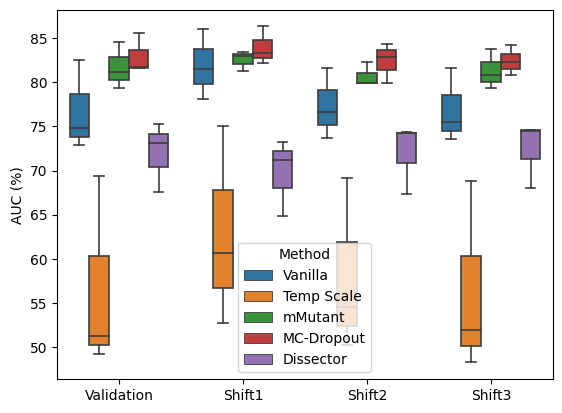

In [36]:
# Reshape the data using melt function
data_melt = pd.melt(
    time_cs_df, 
    id_vars=['Method', 'Metric', 'Shift', 'Task', 'Model'],
    value_vars=['Validation', 'Shift1', 'Shift2', 'Shift3'],
    var_name='Shift_Intensity', 
    value_name='AUC',
)

# Plot boxplot using seaborn
method_order = ['Vanilla', 'Temp Scale', 'mMutant', 'MC-Dropout', 'Dissector']
sns.boxplot(data=data_melt, x='Shift_Intensity', y='AUC', hue='Method', hue_order=method_order, linewidth=1.2)
plt.xlabel('')
plt.ylabel('AUC (%)')
plt.show()